In [16]:
from keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
import warnings
warnings.filterwarnings('ignore')

num_classes = 3
model = Sequential()
model.add(ResNet50(include_top=False, weights='imagenet',pooling='avg'))
model.add(Dense(num_classes, activation='softmax'))
model.layers[0].trainable = False
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 3)                 6147      
                                                                 
Total params: 23,593,859
Trainable params: 6,147
Non-trainable params: 23,587,712
_________________________________________________________________


In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

In [13]:
import numpy as np
import pandas as pd
import os

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input


data_generator =  ImageDataGenerator(preprocess_input,validation_split=0.2,width_shift_range=0.2, height_shift_range=0.2, zoom_range=0.2, horizontal_flip=True)
image_size = 224
train_generator = data_generator.flow_from_directory(
    r"C:\Users\Guhan Ramachandran\Google Drive\data Science\Deep Learning\hackathon\Age Detection\age-detector\train\Train",
    target_size=(image_size, image_size),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=100,
    subset='training'
)

val_generator = data_generator.flow_from_directory(
    r"C:\Users\Guhan Ramachandran\Google Drive\data Science\Deep Learning\hackathon\Age Detection\age-detector\train\Train",
    target_size=(image_size, image_size),
    color_mode='rgb',
    class_mode='categorical',
    subset='validation'
)

test_generator = datagen.flow_from_directory(
    r"C:\Users\Guhan Ramachandran\Google Drive\data Science\Deep Learning\hackathon\Age Detection\age-detector\test",
    target_size=(image_size, image_size),
    color_mode='rgb',
    classes=['test'],
    class_mode=None,
    shuffle=False
)

Found 15926 images belonging to 3 classes.
Found 3980 images belonging to 3 classes.


In [18]:
history = model.fit_generator(train_generator, epochs=1, validation_data=val_generator,validation_steps=1)

160/160 [==============================] - 1628s 10s/step - loss: 0.8462 - categorical_accuracy: 0.6212 - val_loss: 0.7890 - val_categorical_accuracy: 0.5625


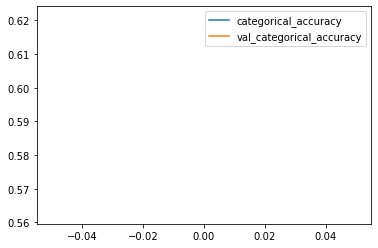

In [20]:
import matplotlib.pyplot as plot

plot.plot(history.history['categorical_accuracy'])
plot.plot(history.history['val_categorical_accuracy'])
plot.legend(['categorical_accuracy','val_categorical_accuracy'])